In [1]:
import pandas as pd
df = pd.read_csv('real_estate_dataset.csv')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ID', 'Price'])
y = df['Price']

scaler_encoder = StandardScaler()
scaled_X = scaler_encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size=0.3, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tqdm.keras import TqdmCallback

In [5]:
model = Sequential([
    Dense(128, activation='relu', input_shape=[scaled_X.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',          
    metrics=['r2_score'] 
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=1000,            # increase the epochs to train model very well
    verbose=0,              # disable default Keras logs
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [7]:
loss, r2_score = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Squared Error (MSE): {loss:.2f}")
print(f"R2 Score (R2): {r2_score:.2f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7255760384.0000 - r2_score: 0.5184  
Mean Squared Error (MSE): 7209734656.00
R2 Score (R2): 0.52


In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
predictions = model.predict(X_test)
print(f"Mean Sqaure Error : {mean_squared_error(y_test, predictions)}")
print(f"Mean Absolue Error : {mean_absolute_error(y_test, predictions)}")
print(f"R2 Score : {r2_score(y_test, predictions)}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Sqaure Error : 7209735297.503482
Mean Absolue Error : 69424.75446268964
R2 Score : 0.5174529288742862


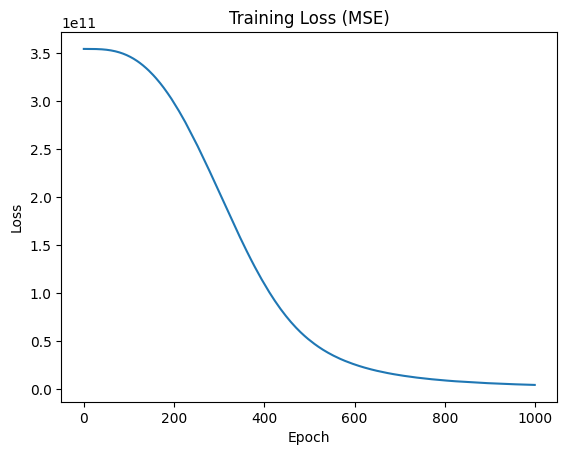

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()